In [1]:
import numpy as np
from numpy.random import normal as normal
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib.colors
from matplotlib.cm import ScalarMappable, get_cmap
#import matplotlib
%pylab inline --no-import-all
print('matplotlib: '+matplotlib.__version__)

numpy: 1.16.1
Populating the interactive namespace from numpy and matplotlib
matplotlib: 3.0.2


In [2]:
# 切り捨て
def floor(src, range):
    return (int)(src / range) * range

# 切り上げ


def ceil(src, range):
    return ((int)(src / range) + 1) * range

In [3]:
#all_particle_data = np.load("Result/all_particle_data.npy")
all_particle_data_with_cost = np.load("Result/all_particle_data_with_cost.npy")
n_iterations = all_particle_data_with_cost.shape[0]
n_particles = all_particle_data_with_cost.shape[1]
all_particle_data_with_cost = all_particle_data_with_cost.T
range_max = [100, 100, 100, 100, 100000000]

In [4]:
nfr = n_iterations  # Number of frames
fps = 1  # Frame per sec
xs = []
ys = []
zs = []
ws = []
vs = []
for iteration in range(n_iterations):
    xs.append(all_particle_data_with_cost[0].T[iteration]/1000)
    ys.append(all_particle_data_with_cost[1].T[iteration])
    zs.append(all_particle_data_with_cost[2].T[iteration])
    ws.append(all_particle_data_with_cost[3].T[iteration])
    vs.append(all_particle_data_with_cost[4].T[iteration])


def Convert_int(ndarray):
    return ndarray.astype(np.int32)


vs = list(map(Convert_int, vs))

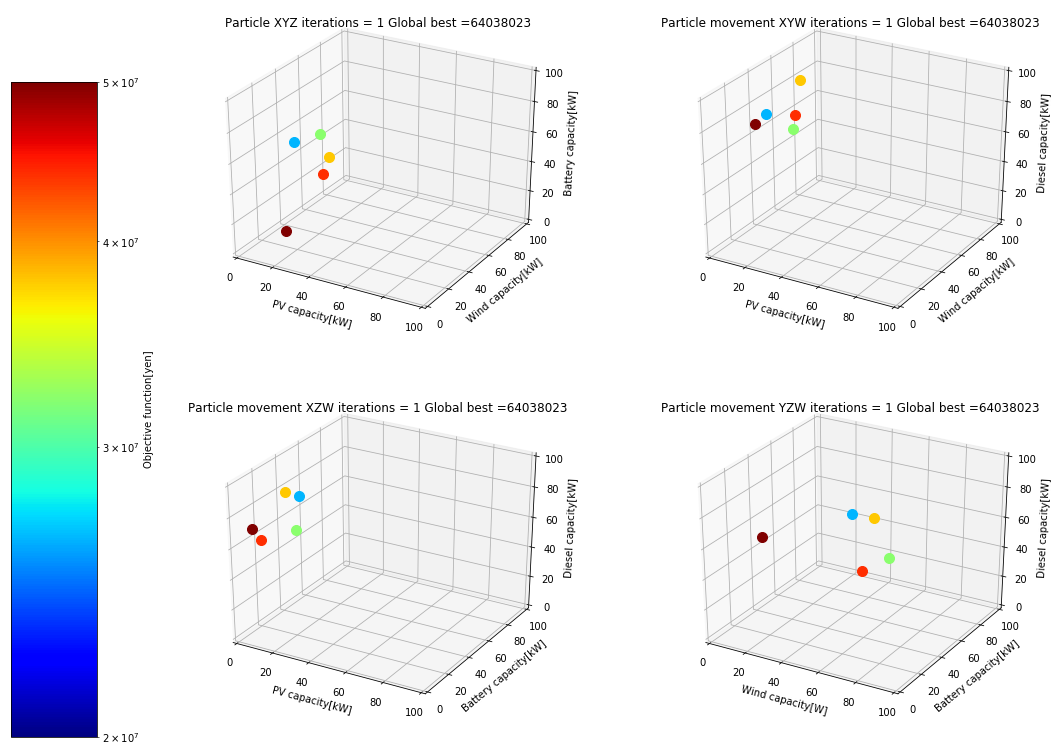

In [5]:
# %% Create Color Map
cmap = get_cmap('jet')
ytick_max = ceil((np.max(vs)-(2e+7)), 1e+7)
ytick_min = floor(np.min(vs), 1e+7)
norm = matplotlib.colors.LogNorm(vmin=ytick_min, vmax=ytick_max)
mappable = ScalarMappable(cmap=cmap, norm=norm)
mappable._A = []

fig = plt.figure(figsize=(24, 13))

ax1 = fig.add_subplot(232, projection='3d')
ax2 = fig.add_subplot(233, projection='3d')
ax3 = fig.add_subplot(235, projection='3d')
ax4 = fig.add_subplot(236, projection='3d')


def update(ifrm, xa, ya, za, wa, va):
    ax1.cla()
    ax2.cla()
    ax3.cla()
    ax4.cla()
    for particle in range(n_particles):
        # ax1
        ax1.scatter(xa[ifrm][particle], ya[ifrm][particle], za[ifrm][particle],
                    s=100, color=cmap(norm(va[ifrm][particle])), marker='o')
        ax1.set_title('Particle XYZ iterations = ' + str(ifrm+1) +
                      " Global best ="+str(np.max(va[ifrm])), y=1.0)
        ax1.set_xlim(0, range_max[0])
        ax1.set_ylim(0, range_max[1])
        ax1.set_zlim(0, range_max[2])
        ax1.set_xlabel('PV capacity[kW]')
        ax1.set_ylabel('Wind capacity[kW]')
        ax1.set_zlabel('Battery capacity[kW]')
        # ax2
        ax2.scatter(xa[ifrm][particle], ya[ifrm][particle], wa[ifrm][particle],
                    s=100, color=cmap(norm(va[ifrm][particle])), marker='o')
        ax2.set_title('Particle movement XYW iterations = ' +
                      str(ifrm+1)+" Global best ="+str(np.max(va[ifrm])), y=1.0)
        ax2.set_xlim(0, range_max[0])
        ax2.set_ylim(0, range_max[1])
        ax2.set_zlim(0, range_max[3])
        ax2.set_xlabel('PV capacity[kW]')
        ax2.set_ylabel('Wind capacity[kW]')
        ax2.set_zlabel('Diesel capacity[kW]')
        # ax3
        ax3.scatter(xa[ifrm][particle], za[ifrm][particle], wa[ifrm][particle],
                    s=100, color=cmap(norm(va[ifrm][particle])), marker='o')
        ax3.set_title('Particle movement XZW iterations = ' +
                      str(ifrm+1)+" Global best ="+str(np.max(va[ifrm])), y=1.0)
        ax3.set_xlim(0, range_max[0])
        ax3.set_ylim(0, range_max[2])
        ax3.set_zlim(0, range_max[3])
        ax3.set_xlabel('PV capacity[kW]')
        ax3.set_ylabel('Battery capacity[kW]')
        ax3.set_zlabel('Diesel capacity[kW]')

        # ax4
        ax4.scatter(ya[ifrm][particle], za[ifrm][particle], wa[ifrm][particle],
                    s=100, color=cmap(norm(va[ifrm][particle])), marker='o')
        ax4.set_title('Particle movement YZW iterations = ' +
                      str(ifrm+1)+" Global best ="+str(np.max(va[ifrm])), y=1.0)
        ax4.set_xlim(0, range_max[1])
        ax4.set_ylim(0, range_max[2])
        ax4.set_zlim(0, range_max[3])
        ax4.set_xlabel('Wind capacity[W]')
        ax4.set_ylabel('Battery capacity[kW]')
        ax4.set_zlabel('Diesel capacity[kW]')

cbar_ax = fig.add_axes([0.3, 0.1, 0.05, 0.7])
cbar = fig.colorbar(mappable, cax=cbar_ax, shrink=0.5)
cbar.set_label('Objective function[yen]')
ticks = np.linspace(ytick_min, ytick_max, 5)

ani = animation.FuncAnimation(fig, update, nfr, fargs=(
    xs, ys, zs, ws, vs), interval=1000/fps)

In [6]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=fps, metadata=dict(artist='Yuichiro'))

ani.save('Result/plot_3d_scatter_funcanimation.mp4', writer=writer)

In [7]:
s = ani.to_jshtml()
with open( 'Result/plot_3d_scatter_funcanimation.html', 'w') as f:
    f.write(s)